# Homework \#4
Due July 15 @ 11:59pm

## Submission requirements
Upload a **single PDF file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your PDF corresponds to.

## Problem 1 -- Tradeoffs and Regularization

Suppose we are planning a route for a new autonomous vehicle that will be used to map out the terrain in a certain area.  The terrain has quite a few hills and valleys, so the vehicle will need to be able to speed up (to make it up a hill) or slow down (to keep from losing control going downhill). We would like to plan our speed changes based on the elevation analysis we have already performed. There are 300 discrete points where we will need to change speed. Speed changes are "one-dimensional"; a speed change of 1 means we have increased our speed by 1 mile per hour. A speed change of -1 means we have decreased our speed by 1 mile an hour. The desired sequence of speeds is given by the plot produced by the code snippet below.

Abrupt changes in speed are bad for the vehicle and could potentially cause a loss of control of the vehicle. We would like to find an alternative sequence of speed changes that gives us a tradeoff between matching the desired speeds in the graph below and a sequence of speed changes that gives us desirable properties. In particular, we will be interested in making sure our speed transitions are smooth (not too abrupt). If we denote our speed changes at each discrete time by $u_1,u_2,...,u_{300}$, we can characterize smoothness by using the sum of the squared differences between each successive speed:

$$R(u) = (u_2-u_1)^2 + (u_3-u_2)^2 + \dotsm + (u_{300}-u_{299})^2$$

Of course, the smaller we make $R(u)$ the smoother our transitions will be. 

Find a set of optimal sequences of speed changes that explores the tradeoff between matching the desired seuqence given in the graph below and keeping the transitions smooth.   Include a plot comparing the desired speeds to at least 4 different smoothed versions. Use regularization weights of 0.1, 1, 10, and at least one other weight that you choose. Also plot your solutions on a Pareto curve. To "fill in" the rest of the curve, either draw or describe in a few words what you think the Pareto curve would look like if you filled in all the points. 

Use the code provided below to generate data for your model.

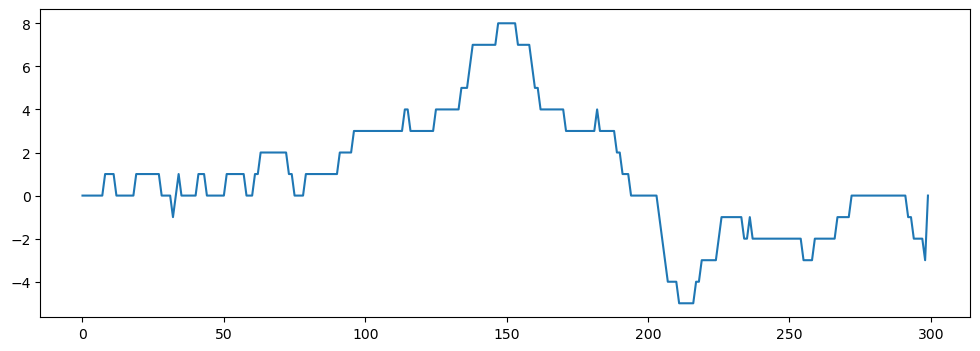

In [2]:
using Random
# set a seed so we get the same output every time
seed = 393845
Random.seed!(seed)
# initialize the vector of speeds
val = 0; u = zeros(300); u[1] = val
# set a density that determines how often the speed changes
# low density corresponds to infrequent speed changes
dens = 0.1
# build speed vector for all times between now and time 299
for i in 2:299
    # if a uniform(0,1) variable is < density
    if rand() < dens
        # increase the speed by 1 mph
        val = val + 1
        u[i] = val
        # if a uniform(0,1) variable is >= 1 - density
    elseif rand() >= 1.0-dens
        # decrease the speed by 1 mph
        val = val - 1
        u[i] = val
    else# otherwise the speed stays the same
        u[i] = val
    end
end
# the final speed must be 0
u[300] = 0
# T = 300
T = length(u)
# plot the speeds (your figure should match the one in the assignment!)
using PyPlot
figure(figsize=(12,4))
plot(u,"-");

In [3]:
using JuMP, Gurobi

function solveOpt(λ)
     m = Model(Gurobi.Optimizer) # need Gurobi since it's nonlinear
    set_optimizer_attribute(m,"OutputFlag",0)
    @variable(m, x[1:300]) #desired speed
    
    @constraint(m, x[1] .== 0)
    @constraint(m, x[300] .== 0)
    
    @objective(m, Min, sum((x[2:300]-x[1:299]).^2) + λ*sum( (x-u).^2 ) )
    optimize!(m)
    error=value(sum( (x-u).^2 )).^0.5
    smoothness=value(sum((x[2:300]-x[1:299]).^2))
    xopt = value.(x)
    return (error,smoothness,xopt)
end

solveOpt (generic function with 1 method)

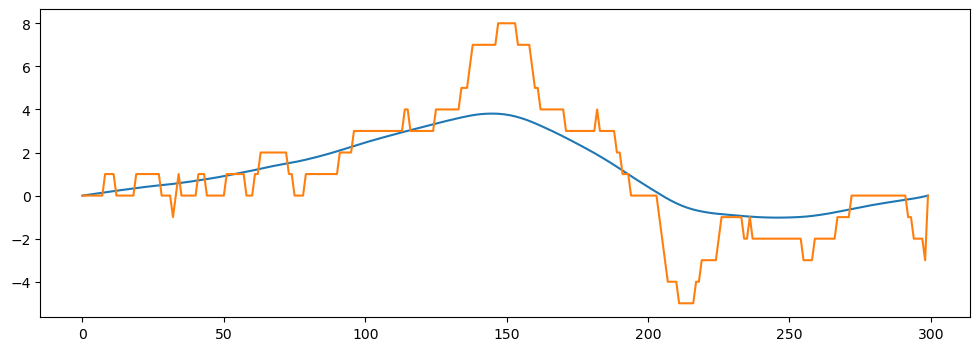

Academic license - for non-commercial use only
Academic license - for non-commercial use only
error is 26.602091634421065
smoothness is 0.4529119790469025


In [4]:
λ = 0.001 # choose a value for λ
(error,smoothness,x1) = solveOpt(λ) # solve model with given λ
using PyPlot
figure(figsize=(12,4))
plot(x1,"-");
plot(u,"-");
println("error is ",error)
println("smoothness is ",smoothness)

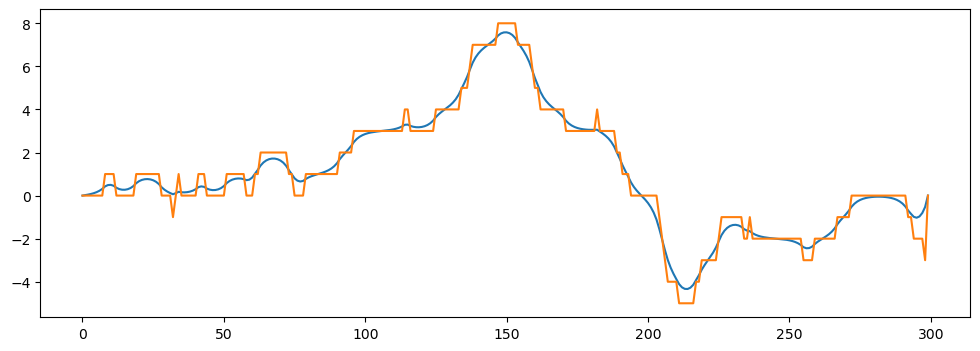

Academic license - for non-commercial use only
Academic license - for non-commercial use only
error is 7.265311341463485
smoothness is 6.414544300667392


In [5]:
λ = 0.1 # choose a value for λ
(error,smoothness,x2) = solveOpt(λ) # solve model with given λ
using PyPlot
figure(figsize=(12,4))
plot(x2,"-");
plot(u,"-");
println("error is ",error)
println("smoothness is ",smoothness)

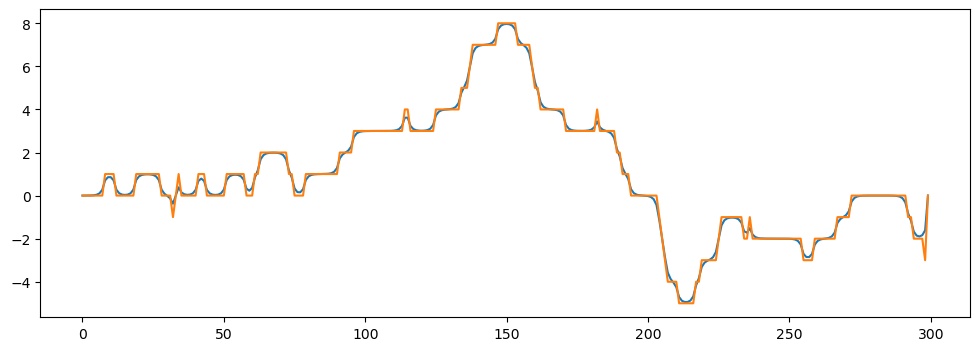

Academic license - for non-commercial use only
Academic license - for non-commercial use only
error is 3.330766690617034
smoothness is 19.430468746833853


In [6]:
λ = 1 # choose a value for λ
(error,smoothness,x3) = solveOpt(λ) # solve model with given λ
using PyPlot
figure(figsize=(12,4))
plot(x3,"-");
plot(u,"-");
println("error is ",error)
println("smoothness is ",smoothness)

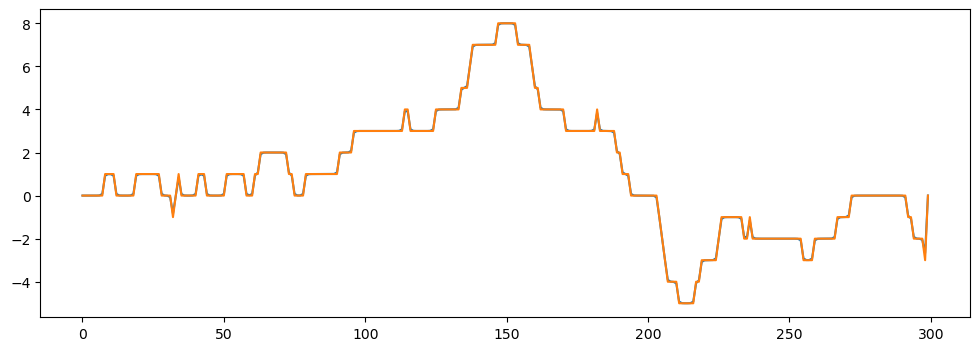

Academic license - for non-commercial use only
Academic license - for non-commercial use only
error is 0.8514332393947991
smoothness is 47.49529862811888


In [7]:
λ = 10 # choose a value for λ
(error,smoothness,x4) = solveOpt(λ) # solve model with given λ
using PyPlot
figure(figsize=(12,4))
plot(x4,"-");
plot(u,"-");
println("error is ",error)
println("smoothness is ",smoothness)

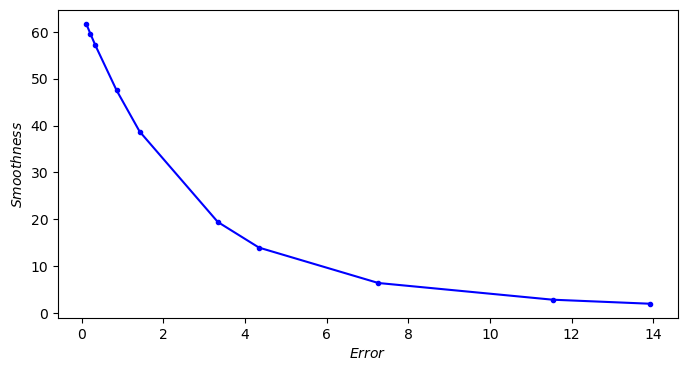

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [8]:
λ=[0.01,0.02,0.10,0.5,1,5,10,30,50,100]
y1 = zeros(10)
y2 = zeros(10)
for i in 1:10
    (y1[i],y2[i],x) = solveOpt(λ[i])
end;

using PyPlot
figure(figsize=(8,4))
plot( y1, y2, "b.-" )
xlabel(L"Error")
ylabel(L"Smoothness");

**Error is inversely proportional to smoothness.\
Because the larger λ is, the more important the error is to the final optimization result, so when λ is large, the optimized curve will have a higher degree of coincidence with the original curve; when λ is very small, the new curve tends to be smoother, but the degree of coincidence with the original curve is not high.**

## Problem 2 -- Polynomial Regression

In this question, we will revisist the setting of Problem 1 but using a different approach. Suppose our task is the same: we want to match our speed changes to the desired sequence of speed changes given in the graph above. We also want to keep the transisions relatively "smooth." In Problem 1, we accomplished this by using regularization. Now, suppose instead we have been told that our vehicle can only change speed in such a way as to follow a polynomial curve where the speed is a function of time. We can program our vehicle to make speed changes according to a polynomial of degree 3. Perform polynomial regression on the data given in Problem 1 for a polynomial of degree 3.

You can use any technique you like to solve this problem, but do not build an optimization model in JuMP!

(a) What are the coefficients of your polynomial?

$x=\left[ \begin{array}{ccc} 1\\2\\...\\300 \end{array} \right]$
$A=\left[ \begin{array}{ccc} x_1^3 & x_1^2 & x_1 & 1\\  x_2^3 & x_2^2 & x_2 & 1\\ ...&...&...&...\\ x_{300}^3 & x_{300}^2 & x_{300} & 1 \end{array} \right]$
$w=\left[ \begin{array}{ccc} w_1\\w_2\\w_3\\w_4 \end{array} \right]$
$y=\left[ \begin{array}{ccc} y_1\\y_2\\...\\y_{300} \end{array} \right]$

We need to solve: Aw=y\
So the result is w=A\d

In [9]:
x=[i for i in 1:300]
A=[x'.^3;x'.^2; x'; x'.^0]'
w=A\u
display(w)

4-element Array{Float64,1}:
  1.3446111014666878e-6
 -0.0008256988224646964
  0.1286361181683565   
 -2.5748452841887266   

(b) Graph the polynomial against the desired speed changes from Problem 1. Does it look like a good fit for your data?

**I also draw the regularization curve with $\lambda=0.1$ to compare these two methods.**

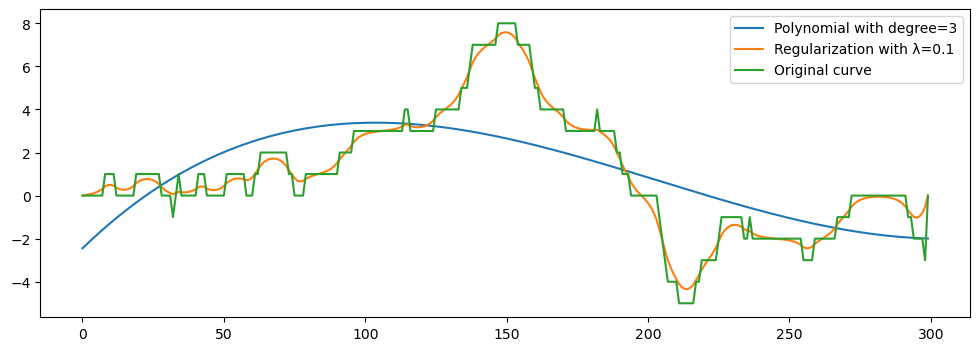

PyObject <matplotlib.legend.Legend object at 0x7fec18ef79d0>

In [10]:
x_new=A*w
using PyPlot
figure(figsize=(12,4))
plot(x_new,"-");
plot(x2,"-");
plot(u,"-");

legend(["Polynomial with degree=3", "Regularization with λ=0.1","Original curve"])


(c) What is the total 2-norm error between the desired speed changes and the speed changes produced by your polynomial? In a broad sense, how does it compare to what you found in Problem 1? What conclusions can you draw by comparing these two techniques?

In [11]:
e=sum(((x_new-u).^2)).^0.5
println("Error is ",e)

Error is 36.56568828347536


**Regularization method is better for this problem.\
For the regularization method, if the $\lambda$ we choose is too big, it will lead to overfitting. On the other hand, if the $\lambda$ is too small, the error will be large.\
For the polynomial method, we get such a large error with degree 3, but I also tried higher degree as below:** 

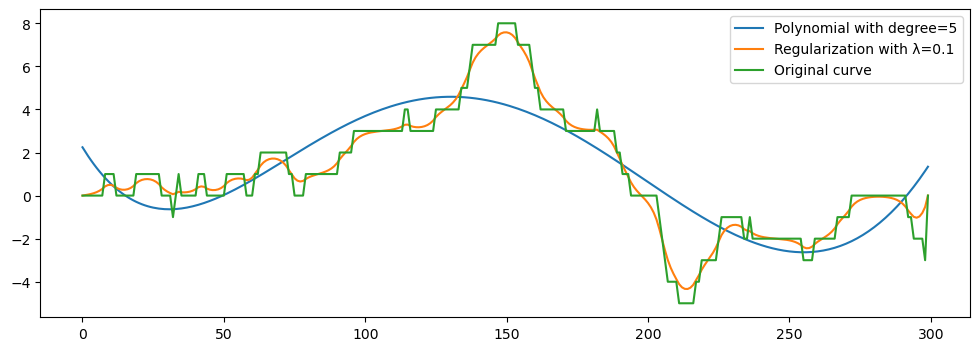

Error is 27.38282672113135


In [12]:
x5=[i for i in 1:300]
A5=[x'.^5;x'.^4;x'.^3;x'.^2; x'; x'.^0]'
w5=A5\u

x_new5=A5*w5
using PyPlot
figure(figsize=(12,4))
plot(x_new5,"-");
plot(x2,"-");
plot(u,"-");

legend(["Polynomial with degree=5", "Regularization with λ=0.1","Original curve"])

e5=sum(((x_new5-u).^2)).^0.5
println("Error is ",e5)

**The error is indeed reduced but the coincidence with the original data is still too low, but the model complexity is greatly increased, I don’t think this is a good idea.\
Maybe piecewise fitting can get better results, I made an attempt:**

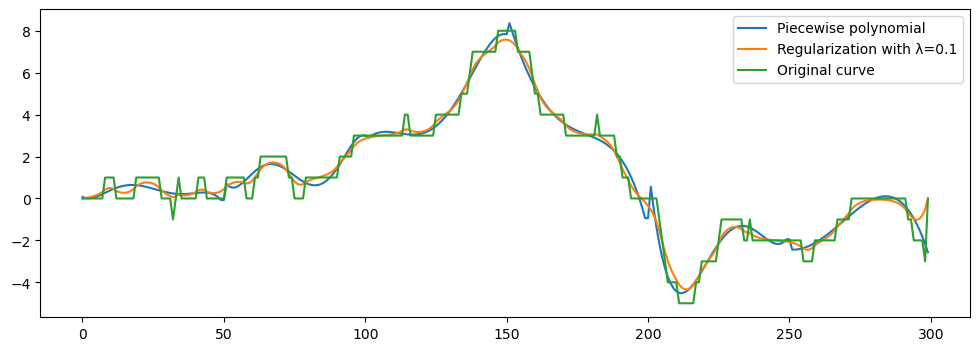

Error is 8.461173853402538


In [13]:
x11=[i for i in 1:50]
x12=[i for i in 51:100]
x13=[i for i in 101:150]
x14=[i for i in 151:200]
x15=[i for i in 201:250]
x16=[i for i in 251:300]

A11=[x11'.^5;x11'.^4;x11'.^3;x11'.^2; x11'; x11'.^0]'
A12=[x12'.^5;x12'.^4;x12'.^3;x12'.^2; x12'; x12'.^0]'
A13=[x13'.^5;x13'.^4;x13'.^3;x13'.^2; x13'; x13'.^0]'
A14=[x14'.^5;x14'.^4;x14'.^3;x14'.^2; x14'; x14'.^0]'
A15=[x15'.^5;x15'.^4;x15'.^3;x15'.^2; x15'; x15'.^0]'
A16=[x16'.^5;x16'.^4;x16'.^3;x16'.^2; x16'; x16'.^0]'

w11=A11\u[1:50]
w12=A12\u[51:100]
w13=A13\u[101:150]
w14=A14\u[151:200]
w15=A15\u[201:250]
w16=A16\u[251:300]

x_new11=A11*w11
x_new12=A12*w12
x_new12[1]=x_new11[50]
x_new13=A13*w13
x_new13[1]=x_new12[50]
x_new14=A14*w14
x_new14[1]=x_new13[50]
x_new15=A15*w15
x_new15[1]=x_new14[50]
x_new16=A16*w16
x_new16[1]=x_new15[50]


x=[x_new11;x_new12;x_new13;x_new14;x_new15;x_new16]

using PyPlot
figure(figsize=(12,4))
plot(x,"-");
plot(x2,"-");
plot(u,"-");

legend(["Piecewise polynomial", "Regularization with λ=0.1","Original curve"])

err=sum(((x-u).^2)).^0.5
println("Error is ",err)

**The error is indeed reduced, the fit is also greatly improved, my direction is correct.**